In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

 Use this notebook as a starting point for your own work in Project 2 of this course.

In [ ]:
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, whic

In [1]:
# download the dataset from kaggle if you do not have a Kaggle account, you need to create one
# Use the Kaggle public API and output a token into your local drive ("Downloads" for windows PCs)

!pip install -q kaggle
from google.colab import files
files.upload() #Upload the token file containing  the token
# create a directory named kaggle and copy kaggle.json file to kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d jessicali9530/celeba-dataset

# unzip the dataset to the current directory and remove the zip file
!unzip celeba-dataset.zip -d celeba-dataset && rm celeba-dataset.zip

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Importing needed libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import random
from mlxtend.preprocessing import shuffle_arrays_unison
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras import layers

# import tensorflow as tf
# from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import warnings
from keras.metrics import binary_accuracy
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
%matplotlib inline

2024-03-20 20:32:08.331467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 20:32:08.331591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 20:32:08.459265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
#  read in the annotations
attr_df = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
attr_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
attr_df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
# target only the required targets from the annotations data frame and discard the rest


In [ ]:
#  read in the landmarks
landmarks_df = pd.read_csv('celeba-dataset/list_landmarks_align_celeba.csv')
landmarks_df

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151


In [ ]:
# read in the bounding boxes - these will be used to crop the images
# bbox_df = pd.read_csv('celeba-dataset/list_bbox_celeba.csv')
# bbox_df.head()

In [ ]:
# read in the partitions to discover train, validation and test segments
partition_df = pd.read_csv('celeba-dataset/list_eval_partition.csv')
partition_df

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [ ]:
partition_df['partition'].value_counts()

partition
0    162770
2     19962
1     19867
Name: count, dtype: int64

In [ ]:
# Since only 3 datasets are used so first we will create a new dataset using these 2 datasets

In [ ]:
new_df=attr_df.merge(partition_df,on='image_id')
new_df=new_df.merge(landmarks_df,on='image_id')
new_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,69,111,108,111,90,137,71,153,106,151


## **Preprocessing**

In [ ]:
# Now preprocessing will be done prior to the partitioning of dataset into train,test and validation.

In [ ]:
# 1. Add the full path to image_id columns

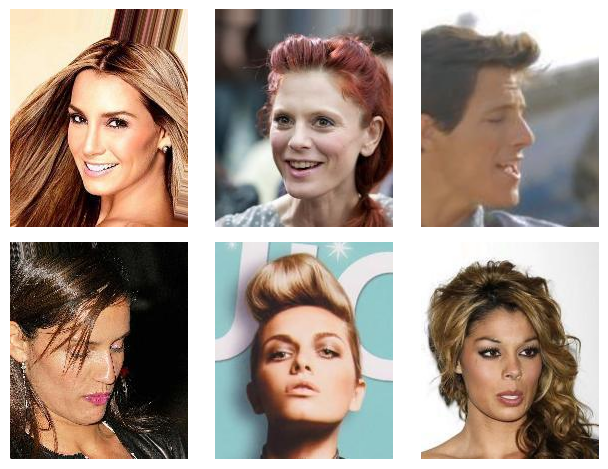

In [ ]:
IMG_PATH="celeba-dataset/img_align_celeba/img_align_celeba"
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)

    # Read an Image.
    img = cv2.imread(IMG_PATH + '/' + new_df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image.
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
replace_paths={}
for val in new_df['image_id']:
  replace_paths[val]=IMG_PATH+"/"+val
new_df['image_id']=new_df['image_id'].map(replace_paths)
new_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,celeba-dataset/img_align_celeba/img_align_cele...,-1,1,1,-1,-1,-1,-1,-1,-1,...,69,109,106,113,77,142,73,152,108,154
1,celeba-dataset/img_align_celeba/img_align_cele...,-1,-1,-1,1,-1,-1,-1,1,-1,...,69,110,107,112,81,135,70,151,108,153
2,celeba-dataset/img_align_celeba/img_align_cele...,-1,-1,-1,-1,-1,-1,1,-1,-1,...,76,112,104,106,108,128,74,156,98,158
3,celeba-dataset/img_align_celeba/img_align_cele...,-1,-1,1,-1,-1,-1,-1,-1,-1,...,72,113,108,108,101,138,71,155,101,151
4,celeba-dataset/img_align_celeba/img_align_cele...,-1,1,1,-1,-1,-1,1,-1,-1,...,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,celeba-dataset/img_align_celeba/img_align_cele...,-1,-1,1,-1,-1,-1,1,-1,-1,...,69,111,108,111,89,140,73,151,104,153
202595,celeba-dataset/img_align_celeba/img_align_cele...,-1,-1,-1,-1,-1,1,1,-1,-1,...,67,112,110,112,85,141,66,150,110,150
202596,celeba-dataset/img_align_celeba/img_align_cele...,-1,-1,-1,-1,-1,-1,-1,-1,1,...,69,111,107,111,92,137,68,151,109,153
202597,celeba-dataset/img_align_celeba/img_align_cele...,-1,1,1,-1,-1,-1,1,-1,1,...,69,111,108,111,90,137,71,153,106,151


In [ ]:
# 2. Replace -1 with 0 in all columns since it will be in accordance with the accuracy of binary crossentropy

In [ ]:
for col in new_df.columns:
  new_df[col]=np.where(new_df[col]==-1,0,new_df[col])

In [ ]:
new_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,69,109,106,113,77,142,73,152,108,154
1,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,1,0,...,69,110,107,112,81,135,70,151,108,153
2,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,1,0,0,...,76,112,104,106,108,128,74,156,98,158
3,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,72,113,108,108,101,138,71,155,101,151
4,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,1,0,0,...,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,1,0,0,...,69,111,108,111,89,140,73,151,104,153
202595,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,1,1,0,0,...,67,112,110,112,85,141,66,150,110,150
202596,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,69,111,107,111,92,137,68,151,109,153
202597,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,1,0,1,...,69,111,108,111,90,137,71,153,106,151


## **Splitting**

In [ ]:
# Now Divide the integrated data frame into train, test and validation data frames based on the partition column 0-train, 1-test, 2-validation


In [ ]:
train_df = new_df[new_df['partition'] == 0]
test_df = new_df[new_df['partition'] == 1]
val_df = new_df[new_df['partition'] == 2]

In [ ]:
train_df.shape,test_df.shape,val_df.shape

((162770, 52), (19867, 52), (19962, 52))

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
# Shuffle

train_df = train_df.sample(frac = 1)
train_df.reset_index(inplace=True,drop=True)
train_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,70,111,108,111,97,143,74,153,102,152
1,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,1,0,0,0,...,68,112,109,111,91,135,71,151,105,151
2,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,1,...,69,112,108,111,88,134,74,152,103,152
3,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,1,...,68,112,109,112,90,138,66,151,111,151
4,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,1,1,...,69,112,108,111,92,138,70,151,106,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162765,celeba-dataset/img_align_celeba/img_align_cele...,1,0,1,1,0,0,0,0,0,...,70,111,107,110,83,135,71,154,106,152
162766,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,70,112,108,110,97,136,74,154,101,151
162767,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,0,1,...,68,112,109,112,91,138,73,152,104,150
162768,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,1,0,0,0,...,70,112,108,110,97,136,75,155,100,151


In [ ]:
# Shuffle

test_df = test_df.sample(frac = 1)
test_df.reset_index(inplace=True,drop=True)
test_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,celeba-dataset/img_align_celeba/img_align_cele...,1,1,1,1,0,0,0,0,1,...,68,112,109,111,92,133,69,151,107,151
1,celeba-dataset/img_align_celeba/img_align_cele...,0,1,0,0,0,1,0,0,0,...,70,110,107,111,90,135,73,153,104,153
2,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,1,...,67,111,109,113,87,135,65,150,112,151
3,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,69,111,107,111,82,136,73,153,105,152
4,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,68,112,109,112,92,139,66,152,111,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,celeba-dataset/img_align_celeba/img_align_cele...,1,0,0,0,0,1,0,1,1,...,70,111,107,111,81,136,73,152,104,153
19863,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,69,112,108,111,80,131,71,152,105,152
19864,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,69,111,108,111,88,139,69,154,108,150
19865,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,1,0,0,1,0,1,...,68,111,109,112,83,133,70,150,108,152


In [ ]:
# Shuffle

val_df = val_df.sample(frac = 1)
val_df.reset_index(inplace=True,drop=True)
val_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,69,112,108,111,89,135,75,152,102,152
1,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,70,111,107,111,87,139,73,152,104,153
2,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,1,1,...,70,111,107,110,81,140,75,153,101,153
3,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,1,0,1,1,...,69,111,108,111,93,139,69,152,107,152
4,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,68,112,109,111,95,134,72,152,104,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,celeba-dataset/img_align_celeba/img_align_cele...,1,0,0,1,0,0,0,0,0,...,69,112,108,111,86,129,75,152,101,152
19958,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,69,111,108,112,93,126,72,151,105,153
19959,celeba-dataset/img_align_celeba/img_align_cele...,0,1,0,0,0,0,0,0,1,...,67,112,110,112,83,137,66,150,110,151
19960,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,1,0,0,...,69,112,109,111,86,125,73,151,103,151


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Sequence
from tensorflow.keras import layers, models
class DataGenerator(Sequence):

    def __init__(self, df, batch_size=32, dim=(218, 178), n_channels=3, n_classes=2, class_names=None, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.class_names = class_names
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        df_temp = self.df.iloc[indexes]
        X, y = self.__data_generation(df_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, df_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, self.n_classes), dtype=int)
        for i, row in enumerate(df_temp.values):
            image_path = row[0]  # assuming the first column contains image paths
            img = cv2.imread(image_path)  # load image using OpenCV
            img = cv2.resize(img, (self.dim[1], self.dim[0]))  # resize image

            img = img.astype(np.float32)  # Convert to float32 if not already
            # Normalize image while ensuring values are within [0, 1] range
            img_min = np.min(img)
            img_max = np.max(img)
            if img_min < 0 or img_max > 255:
                raise ValueError("Image values are not within expected range [0, 255].")
            img = (img - img_min) / (img_max - img_min)




#             img = img / 255.0  # normalize image

            X[i,] = img

            # Assuming the next two columns are for the binary classification labels
            y[i,] = row[1:3]

        return X, y


## **R1**

In [ ]:
train_df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,70,111,108,111,97,143,74,153,102,152
1,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,1,0,0,0,...,68,112,109,111,91,135,71,151,105,151
2,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,1,...,69,112,108,111,88,134,74,152,103,152
3,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,1,...,68,112,109,112,90,138,66,151,111,151
4,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,1,1,...,69,112,108,111,92,138,70,151,106,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162765,celeba-dataset/img_align_celeba/img_align_cele...,1,0,1,1,0,0,0,0,0,...,70,111,107,110,83,135,71,154,106,152
162766,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,70,112,108,110,97,136,74,154,101,151
162767,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,0,1,...,68,112,109,112,91,138,73,152,104,150
162768,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,1,0,0,0,...,70,112,108,110,97,136,75,155,100,151


In [ ]:
train_df['Male']

0         0
1         0
2         0
3         1
4         1
         ..
162765    1
162766    1
162767    1
162768    0
162769    0
Name: Male, Length: 162770, dtype: int64

In [ ]:
class_names = ['Male', 'Bushy_Eyebrows']  # Specify class names here

train_small_df = train_df.sample(frac=0.1)
val_small_df = val_df.sample(frac=0.1)
test_small_df = test_df.sample(frac=0.1)

# Create instances of DataGenerator for training, validation, and testing
train_generator = DataGenerator(train_small_df, class_names=class_names)
val_generator = DataGenerator(val_small_df, class_names=class_names)
test_generator = DataGenerator(test_small_df, class_names=class_names)





model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu', input_shape = (218,178,3)))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2), strides=(1,1)))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))

model.add(layers.Dense(2, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()
history=model.fit(train_generator, epochs=5, validation_data=val_generator)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 218, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 218, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 89, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 108, 88, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 304128)         │     1,216,512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   155,714,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,254,818 (599.88 MB)

 Trainable params: 156,646,562 (597.56 MB)

 Non-trainable params: 608,256 (2.32 MB)

Epoch 1/5


2024-03-20 20:32:57.603641: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.05586, expected 3.06788
2024-03-20 20:32:57.603688: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.25994, expected 4.27196
2024-03-20 20:32:57.603697: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.18059, expected 5.19261
2024-03-20 20:32:57.603705: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.70881, expected 3.72082
2024-03-20 20:32:57.603713: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.35377, expected 4.36579
2024-03-20 20:32:57.603720: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.77112, expected 4.78314
2024-03-20 20:32:57.603728: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.06752, expected 4.07954
2024-03-20 20:32:57.603735: E external/local_xla/xla/se

  3/508 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.6267 - loss: 7.4555 

I0000 00:00:1710966785.943704     149 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


508/508 ━━━━━━━━━━━━━━━━━━━━ 48s 67ms/step - accuracy: 0.4724 - loss: 2.0857 - val_accuracy: 0.5484 - val_loss: 0.4398
Epoch 2/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.5632 - loss: 0.3721 - val_accuracy: 0.7122 - val_loss: 0.6335
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.5816 - loss: 0.3446 - val_accuracy: 0.4037 - val_loss: 0.5044
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.6061 - loss: 0.3196 - val_accuracy: 0.6583 - val_loss: 1.8074
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.5923 - loss: 0.3128 - val_accuracy: 0.4511 - val_loss: 0.3620


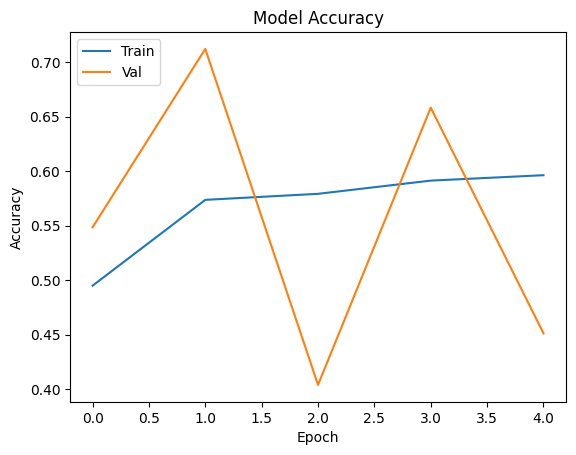

In [ ]:
# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## **R2**

In [ ]:
# Modification of train dataset
female=[]
for val in train_df['Male']:
    if val==0:
        female.append(1)
    elif val==1:
        female.append(0)

train_df['Female']=female

In [ ]:
# Modification of val dataset


female=[]
for val in val_df['Male']:
    if val==0:
        female.append(1)
    elif val==1:
        female.append(0)

val_df['Female']=female

In [ ]:
# Modification of test dataset


female=[]
for val in test_df['Male']:
    if val==0:
        female.append(1)
    elif val==1:
        female.append(0)

test_df['Female']=female

In [ ]:
"Female" in train_df.columns

True

In [ ]:
class_names = ['Female', 'Arched_Eyebrows']  # Specify class names here

train_small_df = train_df.sample(frac=0.1)
val_small_df = val_df.sample(frac=0.1)
test_small_df = test_df.sample(frac=0.1)

# Create instances of DataGenerator for training, validation, and testing
train_generator = DataGenerator(train_small_df, class_names=class_names)
val_generator = DataGenerator(val_small_df, class_names=class_names)
test_generator = DataGenerator(test_small_df, class_names=class_names)





model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu', input_shape = (218,178,3)))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2), strides=(1,1)))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))

model.add(layers.Dense(2, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()
history=model.fit(train_generator, epochs=5, validation_data=val_generator)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 218, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 218, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 109, 89, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 108, 88, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 304128)         │     1,216,512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │   155,714,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,254,818 (599.88 MB)

 Trainable params: 156,646,562 (597.56 MB)

 Non-trainable params: 608,256 (2.32 MB)

Epoch 1/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.3085 - loss: 1.9603 - val_accuracy: 0.2601 - val_loss: 0.5766
Epoch 2/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.2639 - loss: 0.5684 - val_accuracy: 0.2606 - val_loss: 0.5161
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.2619 - loss: 0.5095 - val_accuracy: 0.2621 - val_loss: 0.4871
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.2694 - loss: 0.4882 - val_accuracy: 0.2601 - val_loss: 0.4718
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.2634 - loss: 0.4768 - val_accuracy: 0.2601 - val_loss: 0.4641


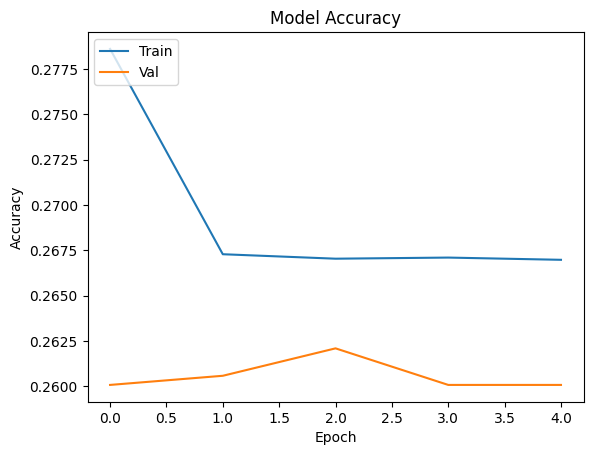

In [ ]:
# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## **R3**

In [ ]:
# Train Dataset

train_df['eye_width']=train_df['righteye_x']-train_df['lefteye_x']
#Step 1: Normalize the "eye_width" column to the range [0, 1]
min_eye_width = train_df['eye_width'].min()
max_eye_width = train_df['eye_width'].max()
train_df['normalized_eye_width'] = (train_df['eye_width'] - min_eye_width) / (max_eye_width - min_eye_width)

# Step 2: Quantize the normalized eye width
# Define the number of quantization levels
num_levels = 4  # For example, dividing the range [0, 1] into 4 equal intervals

# Quantize the normalized eye width
train_df['quantized_eye_width'] = pd.cut(train_df['normalized_eye_width'], bins=num_levels, labels=False)
train_df['quantized_eye_width']=train_df['quantized_eye_width'].map({0:1,1:2,2:3,3:4})
# Display the DataFrame with normalized and quantized eye width
print(train_df[['eye_width', 'normalized_eye_width', 'quantized_eye_width']])

        eye_width  normalized_eye_width  quantized_eye_width
0              38              0.540984                    3
1              41              0.590164                    3
2              39              0.557377                    3
3              41              0.590164                    3
4              39              0.557377                    3
...           ...                   ...                  ...
162765         37              0.524590                    3
162766         38              0.540984                    3
162767         41              0.590164                    3
162768         38              0.540984                    3
162769         41              0.590164                    3

[162770 rows x 3 columns]


In [ ]:
# Validation Dataset
val_df['eye_width']=val_df['righteye_x']-val_df['lefteye_x']
#Step 1: Normalize the "eye_width" column to the range [0, 1]
min_eye_width = val_df['eye_width'].min()
max_eye_width = val_df['eye_width'].max()
val_df['normalized_eye_width'] = (val_df['eye_width'] - min_eye_width) / (max_eye_width - min_eye_width)

# Step 2: Quantize the normalized eye width
# Define the number of quantization levels
num_levels = 4  # For example, dividing the range [0, 1] into 4 equal intervals

# Quantize the normalized eye width
val_df['quantized_eye_width'] = pd.cut(val_df['normalized_eye_width'], bins=num_levels, labels=False)
val_df['quantized_eye_width']=val_df['quantized_eye_width'].map({0:1,1:2,2:3,3:4})
# Display the DataFrame with normalized and quantized eye width
print(val_df[['eye_width', 'normalized_eye_width', 'quantized_eye_width']])

       eye_width  normalized_eye_width  quantized_eye_width
0             39              0.723404                    3
1             37              0.680851                    3
2             37              0.680851                    3
3             39              0.723404                    3
4             41              0.765957                    4
...          ...                   ...                  ...
19957         39              0.723404                    3
19958         39              0.723404                    3
19959         43              0.808511                    4
19960         40              0.744681                    3
19961         38              0.702128                    3

[19962 rows x 3 columns]


In [ ]:
# Test Dataset
test_df['eye_width']=test_df['righteye_x']-test_df['lefteye_x']
#Step 1: Normalize the "eye_width" column to the range [0, 1]
min_eye_width = test_df['eye_width'].min()
max_eye_width = test_df['eye_width'].max()
test_df['normalized_eye_width'] = (test_df['eye_width'] - min_eye_width) / (max_eye_width - min_eye_width)

# Step 2: Quantize the normalized eye width
# Define the number of quantization levels
num_levels = 4  # For example, dividing the range [0, 1] into 4 equal intervals

# Quantize the normalized eye width
test_df['quantized_eye_width'] = pd.cut(test_df['normalized_eye_width'], bins=num_levels, labels=False)
test_df['quantized_eye_width']=test_df['quantized_eye_width'].map({0:1,1:2,2:3,3:4})
# Display the DataFrame with normalized and quantized eye width
print(test_df[['eye_width', 'normalized_eye_width', 'quantized_eye_width']])

       eye_width  normalized_eye_width  quantized_eye_width
0             41              0.770833                    4
1             37              0.687500                    3
2             42              0.791667                    4
3             38              0.708333                    3
4             41              0.770833                    4
...          ...                   ...                  ...
19862         37              0.687500                    3
19863         39              0.729167                    3
19864         39              0.729167                    3
19865         41              0.770833                    4
19866         39              0.729167                    3

[19867 rows x 3 columns]


In [ ]:
val_df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'partition', 'lefteye_x', 'lefteye_y',
       'righteye_x', 'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x',
       'leftmouth_y', 'rightmouth_x', 'rightmouth_y', 'Female', 'eye_width',
       'normalized_eye_width', 'quantized_eye_width'],
      dtype='object')

In [ ]:
train_df['quantized_eye_width'].value_counts()

quantized_eye_width
3    138011
2     24228
1       485
4        46
Name: count, dtype: int64

In [ ]:
train_small_df = train_df.sample(frac=0.1)
images_3D_train=[]
for patht in train_small_df['image_id']:
    images_3D_train.append(cv2.imread(patht))

images_3D_train=np.array(images_3D_train)

In [ ]:
images_3D_train.shape


(16277, 218, 178, 3)

In [ ]:
out_train=[np.array(train_small_df['Male']),np.array(train_small_df['quantized_eye_width'])]
out_train=np.array(out_train)
out_train=out_train.T

In [ ]:
out_train.shape

(16277, 2)

In [ ]:
val_small_df = val_df.sample(frac=0.1)
images_3D_val=[]
for pathv in val_small_df['image_id']:
    images_3D_val.append(cv2.imread(pathv))

images_3D_val=np.array(images_3D_val)


In [ ]:
out_val=[np.array(val_small_df['Male']),np.array(val_small_df['quantized_eye_width'])]
out_val=np.array(out_val)
out_val=out_val.T

In [ ]:
images_3D_train.shape,images_3D_val.shape

((16277, 218, 178, 3), (1996, 218, 178, 3))

In [ ]:
out_train.shape,out_val.shape

((16277, 2), (1996, 2))

In [ ]:
VALIDATION_DATA=(images_3D_val,out_val)

In [ ]:





model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu', input_shape = (218,178,3)))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2), strides=(1,1)))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))

model.add(layers.Dense(2, activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()
history = model.fit(images_3D_train, out_train, validation_data=(images_3D_val, out_val), epochs=5, batch_size=32)



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 218, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 218, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 109, 89, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 108, 88, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 304128)         │     1,216,512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │   155,714,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,254,818 (599.88 MB)

 Trainable params: 156,646,562 (597.56 MB)

 Non-trainable params: 608,256 (2.32 MB)

Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9888 - loss: 4348809216.0000

2024-03-20 21:20:19.122436: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 177: 3.16001, expected 2.72098
2024-03-20 21:20:19.122526: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6941: 3.36475, expected 2.92573
2024-03-20 21:20:19.122672: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38682: 3.35445, expected 2.91543
2024-03-20 21:20:19.122680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38804: 4.44197, expected 3.4849
2024-03-20 21:20:19.122688: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38805: 5.52599, expected 4.56892
2024-03-20 21:20:19.122696: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38806: 5.75801, expected 4.80094
2024-03-20 21:20:19.122703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38807: 5.3889, expected 4.43182
2024-03-20 21:20:19.122711: E ex

509/509 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9888 - loss: 4390493696.0000 - val_accuracy: 0.9995 - val_loss: 145515053056.0000
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9974 - loss: 560568532992.0000 - val_accuracy: 0.9995 - val_loss: 2497135509504.0000
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9982 - loss: 6349705969664.0000 - val_accuracy: 0.9995 - val_loss: 16526031716352.0000
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9975 - loss: 28546265251840.0000 - val_accuracy: 0.9995 - val_loss: 56232031289344.0000
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9979 - loss: 82050577072128.0000 - val_accuracy: 0.9995 - val_loss: 108793845252096.0000


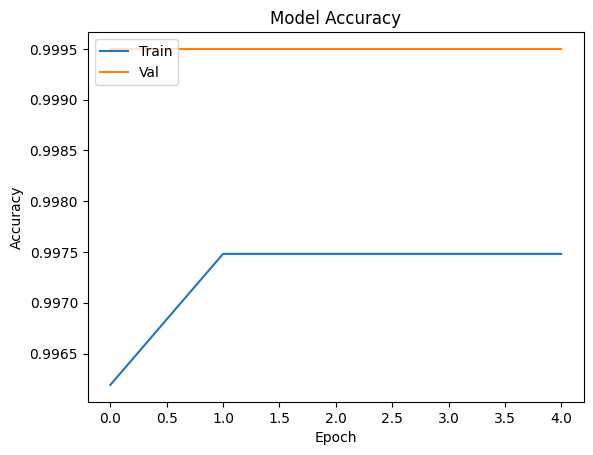

In [ ]:
# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

(A)

In [ ]:
test_df_A=test_df[test_df['quantized_eye_width']==1]
test_df_A

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,Female,eye_width,normalized_eye_width,quantized_eye_width
26,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,64,132,83,161,100,167,0,12,0.166667,1
328,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,65,137,84,163,95,162,1,16,0.250000,1
1620,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,63,134,85,162,99,162,0,16,0.250000,1
1721,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,107,135,81,165,95,162,1,13,0.187500,1
1846,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,64,128,83,166,92,165,0,10,0.125000,1
2128,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,67,136,89,167,95,164,0,8,0.083333,1
2438,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,73,138,84,162,96,163,0,15,0.229167,1
3361,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,111,136,82,167,92,165,0,8,0.083333,1
4190,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,83,143,86,168,90,167,0,4,0.000000,1
4239,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,63,130,83,164,96,162,0,14,0.208333,1


In [ ]:
images_3D_test=[]
for patht in test_df_A['image_id']:
    images_3D_test.append(cv2.imread(patht))

images_3D_test=np.array(images_3D_test)

In [ ]:
images_3D_test.shape

(25, 218, 178, 3)

In [ ]:
out_test=[np.array(test_df_A['Male']),np.array(test_df_A['quantized_eye_width'])]
out_test=np.array(out_test)
out_test=out_test.T

In [ ]:
out_test.shape

(25, 2)

In [ ]:
pred_A=model.predict(images_3D_test)
pred_A.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(25, 2)

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision for the first column (binary classification)
precision_binary = precision_score(out_test[:, 0], pred_A[:, 0], average='binary')

# Calculate precision for the second column (multi-class classification)
precision_multiclass = precision_score(out_test[:, 1], pred_A[:, 1], average='weighted')

print("Precision for binary classification:", precision_binary)
print("Precision for multi-class classification:", precision_multiclass)


Precision for binary classification: 0.0
Precision for multi-class classification: 1.0


(B)

In [ ]:
test_df_B=test_df[test_df['quantized_eye_width']==4]
test_df_B

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,Female,eye_width,normalized_eye_width,quantized_eye_width
0,celeba-dataset/img_align_celeba/img_align_cele...,1,1,1,1,0,0,0,0,1,...,92,133,69,151,107,151,0,41,0.770833,4
2,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,1,...,87,135,65,150,112,151,1,42,0.791667,4
4,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,92,139,66,152,111,150,1,41,0.770833,4
11,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,89,137,69,151,108,150,1,43,0.812500,4
15,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,89,138,69,151,108,151,1,41,0.770833,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,0,1,...,93,139,66,152,109,149,0,42,0.791667,4
19852,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,1,...,88,138,69,150,109,151,1,41,0.770833,4
19855,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,1,0,0,0,...,87,137,70,150,107,152,1,41,0.770833,4
19856,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,92,133,66,152,110,150,1,41,0.770833,4


In [ ]:
images_3D_testB=[]
for patht in test_df_B['image_id']:
    images_3D_testB.append(cv2.imread(patht))

images_3D_testB=np.array(images_3D_testB)

In [ ]:
images_3D_testB.shape

(4866, 218, 178, 3)

In [ ]:
out_testB=[np.array(test_df_B['Female']),np.array(test_df_B['quantized_eye_width'])]
out_testB=np.array(out_testB)
out_testB=out_testB.T

In [ ]:
out_testB.shape

(4866, 2)

In [ ]:
pred_B=model.predict(images_3D_testB)
pred_B.shape

151/153 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

2024-03-20 21:33:52.295378: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 177: 3.1029, expected 2.66016
2024-03-20 21:33:52.295520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21894: 3.42563, expected 2.98288
2024-03-20 21:33:52.295596: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38708: 3.42083, expected 2.97808
2024-03-20 21:33:52.295862: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77608: 4.04045, expected 3.3402
2024-03-20 21:33:52.295898: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77609: 5.21766, expected 4.51742
2024-03-20 21:33:52.295913: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77610: 5.68392, expected 4.98367
2024-03-20 21:33:52.295923: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77611: 5.00109, expected 4.30085
2024-03-20 21:33:52.295934: E e

153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


W0000 00:00:1710970433.328073     150 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


(4866, 2)

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision for the first column (binary classification)
precision_binary = precision_score(out_testB[:, 0], pred_B[:, 0], average='binary')

# Calculate precision for the second column (multi-class classification)
precision_multiclass = precision_score(out_testB[:, 1], pred_B[:, 1], average='weighted')

print("Precision for binary classification:", precision_binary)
print("Precision for multi-class classification:", precision_multiclass)


Precision for binary classification: 0.0
Precision for multi-class classification: 0.0


(C)

In [ ]:
test_df_C=test_df[test_df['quantized_eye_width']==1]
test_df_C

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,Female,eye_width,normalized_eye_width,quantized_eye_width
26,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,64,132,83,161,100,167,0,12,0.166667,1
328,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,65,137,84,163,95,162,1,16,0.250000,1
1620,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,63,134,85,162,99,162,0,16,0.250000,1
1721,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,107,135,81,165,95,162,1,13,0.187500,1
1846,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,64,128,83,166,92,165,0,10,0.125000,1
2128,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,67,136,89,167,95,164,0,8,0.083333,1
2438,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,73,138,84,162,96,163,0,15,0.229167,1
3361,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,111,136,82,167,92,165,0,8,0.083333,1
4190,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,83,143,86,168,90,167,0,4,0.000000,1
4239,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,63,130,83,164,96,162,0,14,0.208333,1


In [ ]:
images_3D_testC=[]
for patht in test_df_C['image_id']:
    images_3D_testC.append(cv2.imread(patht))

images_3D_testC=np.array(images_3D_testC)

In [ ]:
out_testC=[np.array(test_df_C['Male']),np.array(test_df_C['quantized_eye_width'])]
out_testC=np.array(out_testC)
out_testC=out_testC.T

In [ ]:
pred_C=model.predict(images_3D_testC)
pred_C.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(25, 2)

In [ ]:
from sklearn.metrics import precision_score

# Calculate precision for the first column (binary classification)
precision_binary = precision_score(out_testC[:, 0], pred_C[:, 0], average='binary')

# Calculate precision for the second column (multi-class classification)
precision_multiclass = precision_score(out_testC[:, 1], pred_C[:, 1], average='weighted')

print("Precision for binary classification:", precision_binary)
print("Precision for multi-class classification:", precision_multiclass)


Precision for binary classification: 0.0
Precision for multi-class classification: 1.0


(D)

In [ ]:
test_df_D=test_df[test_df['quantized_eye_width']==4]
test_df_D

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,Female,eye_width,normalized_eye_width,quantized_eye_width
0,celeba-dataset/img_align_celeba/img_align_cele...,1,1,1,1,0,0,0,0,1,...,92,133,69,151,107,151,0,41,0.770833,4
2,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,1,...,87,135,65,150,112,151,1,42,0.791667,4
4,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,92,139,66,152,111,150,1,41,0.770833,4
11,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,0,...,89,137,69,151,108,150,1,43,0.812500,4
15,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,89,138,69,151,108,151,1,41,0.770833,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,1,0,0,0,0,1,...,93,139,66,152,109,149,0,42,0.791667,4
19852,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,1,...,88,138,69,150,109,151,1,41,0.770833,4
19855,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,1,0,0,0,...,87,137,70,150,107,152,1,41,0.770833,4
19856,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,0,...,92,133,66,152,110,150,1,41,0.770833,4


In [ ]:
images_3D_testD=[]
for patht in test_df_D['image_id']:
    images_3D_testD.append(cv2.imread(patht))

images_3D_testD=np.array(images_3D_testD)

In [ ]:
out_testD=[np.array(test_df_D['Male']),np.array(test_df_D['quantized_eye_width'])]
out_testD=np.array(out_testD)
out_testD=out_testD.T

In [ ]:
pred_D=model.predict(images_3D_testD)
pred_D.shape

153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


(4866, 2)

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision for the first column (binary classification)
precision_binary = precision_score(out_testD[:, 0], pred_D[:, 0], average='binary')

# Calculate precision for the second column (multi-class classification)
precision_multiclass = precision_score(out_testD[:, 1], pred_D[:, 1], average='weighted')

print("Precision for binary classification:", precision_binary)
print("Precision for multi-class classification:", precision_multiclass)


Precision for binary classification: 0.0
Precision for multi-class classification: 0.0


## **R4**

In [ ]:
# Train Dataset

train_df['mouth_width']=train_df['rightmouth_x']-train_df['leftmouth_x']

#Step 1: Normalize the "mouth_width" column to the range [0, 1]
min_mouth_width = train_df['mouth_width'].min()
max_mouth_width = train_df['mouth_width'].max()
train_df['normalized_mouth_width'] = (train_df['mouth_width'] - min_mouth_width) / (max_mouth_width - min_mouth_width)

# Step 2: Quantize the normalized mouth_width
# Define the number of quantization levels
num_levels = 4  # For example, dividing the range [0, 1] into 4 equal intervals

# Quantize the normalized eye width
train_df['quantized_mouth_width'] = pd.cut(train_df['normalized_mouth_width'], bins=num_levels, labels=False)
train_df['quantized_mouth_width']=train_df['quantized_mouth_width'].map({0:1,1:2,2:3,3:4})

# Display the DataFrame with normalized and quantized eye width
print(train_df[['mouth_width', 'normalized_mouth_width', 'quantized_mouth_width']])


        mouth_width  normalized_mouth_width  quantized_mouth_width
0                28                0.442623                      2
1                34                0.540984                      3
2                29                0.459016                      2
3                45                0.721311                      3
4                36                0.573770                      3
...             ...                     ...                    ...
162765           35                0.557377                      3
162766           27                0.426230                      2
162767           31                0.491803                      2
162768           25                0.393443                      2
162769           33                0.524590                      3

[162770 rows x 3 columns]


In [ ]:
# Validation Dataset

val_df['mouth_width']=val_df['rightmouth_x']-val_df['leftmouth_x']

#Step 1: Normalize the "mouth_width" column to the range [0, 1]
min_mouth_width = val_df['mouth_width'].min()
max_mouth_width = val_df['mouth_width'].max()
val_df['normalized_mouth_width'] = (val_df['mouth_width'] - min_mouth_width) / (max_mouth_width - min_mouth_width)

# Step 2: Quantize the normalized mouth_width
# Define the number of quantization levels
num_levels = 4  # For example, dividing the range [0, 1] into 4 equal intervals

# Quantize the normalized eye width
val_df['quantized_mouth_width'] = pd.cut(val_df['normalized_mouth_width'], bins=num_levels, labels=False)
val_df['quantized_mouth_width']=val_df['quantized_mouth_width'].map({0:1,1:2,2:3,3:4})

# Display the DataFrame with normalized and quantized eye width
print(val_df[['mouth_width', 'normalized_mouth_width', 'quantized_mouth_width']])

       mouth_width  normalized_mouth_width  quantized_mouth_width
0               27                0.400000                      2
1               31                0.472727                      2
2               26                0.381818                      2
3               38                0.600000                      3
4               32                0.490909                      2
...            ...                     ...                    ...
19957           26                0.381818                      2
19958           33                0.509091                      3
19959           44                0.709091                      3
19960           30                0.454545                      2
19961           30                0.454545                      2

[19962 rows x 3 columns]


In [ ]:
# Test Dataset

test_df['mouth_width']=test_df['rightmouth_x']-test_df['leftmouth_x']

#Step 1: Normalize the "mouth_width" column to the range [0, 1]
min_mouth_width = test_df['mouth_width'].min()
max_mouth_width = test_df['mouth_width'].max()
test_df['normalized_mouth_width'] = (test_df['mouth_width'] - min_mouth_width) / (max_mouth_width - min_mouth_width)

# Step 2: Quantize the normalized mouth_width
# Define the number of quantization levels
num_levels = 4  # For example, dividing the range [0, 1] into 4 equal intervals

# Quantize the normalized eye width
test_df['quantized_mouth_width'] = pd.cut(test_df['normalized_mouth_width'], bins=num_levels, labels=False)
test_df['quantized_mouth_width']=test_df['quantized_mouth_width'].map({0:1,1:2,2:3,3:4})

# Display the DataFrame with normalized and quantized eye width
print(test_df[['mouth_width', 'normalized_mouth_width', 'quantized_mouth_width']])

       mouth_width  normalized_mouth_width  quantized_mouth_width
0               38                0.625000                      3
1               31                0.500000                      2
2               47                0.785714                      4
3               32                0.517857                      3
4               45                0.750000                      3
...            ...                     ...                    ...
19862           31                0.500000                      2
19863           34                0.553571                      3
19864           39                0.642857                      3
19865           38                0.625000                      3
19866           40                0.660714                      3

[19867 rows x 3 columns]


In [ ]:
train_small_df = train_df.sample(frac=0.1)
images_3D_train=[]
for patht in train_small_df['image_id']:
    images_3D_train.append(cv2.imread(patht))

images_3D_train=np.array(images_3D_train)

In [ ]:
out_train=[np.array(train_small_df['Smiling']),np.array(train_small_df['quantized_mouth_width'])]
out_train=np.array(out_train)
out_train=out_train.T

In [ ]:
val_small_df = val_df.sample(frac=0.1)
images_3D_val=[]
for pathv in val_small_df['image_id']:
    images_3D_val.append(cv2.imread(pathv))

images_3D_val=np.array(images_3D_val)


In [ ]:
out_val=[np.array(val_small_df['Smiling']),np.array(val_small_df['quantized_mouth_width'])]
out_val=np.array(out_val)
out_val=out_val.T

In [ ]:





model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu', input_shape = (218,178,3)))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.Conv2D(32,(3,3),padding = 'Same', activation ='elu'))
model.add(layers.MaxPooling2D((2,2), strides=(1,1)))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))

model.add(layers.Dense(2, activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()
history = model.fit(images_3D_train, out_train, validation_data=(images_3D_val, out_val), epochs=5, batch_size=32)



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 218, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 218, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 109, 89, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 109, 89, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 108, 88, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 304128)         │     1,216,512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 304128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 512)            │   155,714,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,254,818 (599.88 MB)

 Trainable params: 156,646,562 (597.56 MB)

 Non-trainable params: 608,256 (2.32 MB)

Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9979 - loss: 6944347136.0000 - val_accuracy: 0.9995 - val_loss: 393439248384.0000
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 1.0000 - loss: 788782120960.0000 - val_accuracy: 0.9995 - val_loss: 13960417902592.0000
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 1.0000 - loss: 8067655663616.0000 - val_accuracy: 0.9995 - val_loss: 34443121131520.0000
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 1.0000 - loss: 34106675036160.0000 - val_accuracy: 0.9995 - val_loss: 74175309938688.0000
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 1.0000 - loss: 93541753683968.0000 - val_accuracy: 0.9995 - val_loss: 102352535158784.0000


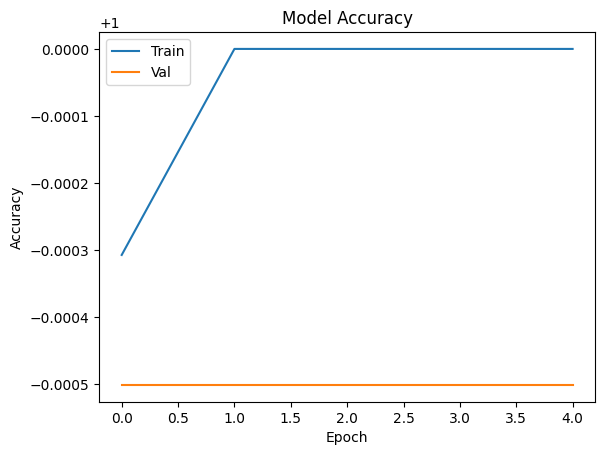

In [ ]:
# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

(A)

In [ ]:
test_df_A=test_df[test_df['quantized_mouth_width']==4]
test_df_A

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,leftmouth_y,rightmouth_x,rightmouth_y,Female,eye_width,normalized_eye_width,quantized_eye_width,mouth_width,normalized_mouth_width,quantized_mouth_width
2,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,0,1,...,150,112,151,1,42,0.791667,4,47,0.785714,4
67,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,0,0,0,0,0,1,...,148,113,149,1,46,0.875000,4,46,0.767857,4
136,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,1,0,0,0,...,151,111,150,0,41,0.770833,4,46,0.767857,4
153,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,1,0,0,0,0,0,...,151,111,150,1,42,0.791667,4,46,0.767857,4
156,celeba-dataset/img_align_celeba/img_align_cele...,0,1,1,1,0,0,0,0,0,...,150,112,150,1,43,0.812500,4,47,0.785714,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19712,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,1,0,0,0,0,0,...,149,113,153,0,42,0.791667,4,46,0.767857,4
19727,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,1,0,0,0,...,151,111,152,0,39,0.729167,3,46,0.767857,4
19752,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,0,0,1,0,...,151,112,151,0,41,0.770833,4,48,0.803571,4
19756,celeba-dataset/img_align_celeba/img_align_cele...,0,0,1,0,0,1,0,0,0,...,151,113,150,1,43,0.812500,4,50,0.839286,4


In [ ]:
images_3D_testA=[]
for patht in test_df_A['image_id']:
    images_3D_testA.append(cv2.imread(patht))

images_3D_testA=np.array(images_3D_testA)

In [ ]:
out_testA=[np.array(test_df_A['Smiling']),np.array(test_df_A['quantized_mouth_width'])]
out_testA=np.array(out_testA)
out_testA=out_testA.T

In [ ]:
pred_A=model.predict(images_3D_testA)
pred_A.shape

21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

2024-03-20 21:52:56.882872: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77608: 3.7096, expected 2.8674
2024-03-20 21:52:56.882937: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77609: 6.97679, expected 6.13459
2024-03-20 21:52:56.882946: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77610: 5.70569, expected 4.86349
2024-03-20 21:52:56.882954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77611: 5.17353, expected 4.33132
2024-03-20 21:52:56.882962: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77612: 5.19964, expected 4.35743
2024-03-20 21:52:56.882969: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77613: 5.08528, expected 4.24308
2024-03-20 21:52:56.882977: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77614: 5.11749, expected 4.27528
2024-03-20 21:52:56.882985: E

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


(777, 2)

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision for the first column (binary classification)
precision_binary = precision_score(out_testA[:, 0], pred_A[:, 0], average='binary')

# Calculate precision for the second column (multi-class classification)
precision_multiclass = precision_score(out_testA[:, 1], pred_A[:, 1], average='weighted')

print("Precision for binary classification:", precision_binary)
print("Precision for multi-class classification:", precision_multiclass)


Precision for binary classification: 0.0
Precision for multi-class classification: 0.0


(B)

In [ ]:
test_df_B=test_df[test_df['quantized_mouth_width']==1]
test_df_B

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,leftmouth_y,rightmouth_x,rightmouth_y,Female,eye_width,normalized_eye_width,quantized_eye_width,mouth_width,normalized_mouth_width,quantized_mouth_width
26,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,161,100,167,0,12,0.166667,1,17,0.250000,1
328,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,163,95,162,1,16,0.250000,1,11,0.142857,1
1183,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,160,91,162,1,18,0.291667,2,11,0.142857,1
1620,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,162,99,162,0,16,0.250000,1,14,0.196429,1
1721,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,165,95,162,1,13,0.187500,1,14,0.196429,1
1812,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,1,1,1,...,156,98,155,0,30,0.541667,3,17,0.250000,1
1846,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,166,92,165,0,10,0.125000,1,9,0.107143,1
2128,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,167,95,164,0,8,0.083333,1,6,0.053571,1
2438,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,0,...,162,96,163,0,15,0.229167,1,12,0.160714,1
2857,celeba-dataset/img_align_celeba/img_align_cele...,0,0,0,0,0,0,0,0,1,...,158,94,158,0,25,0.437500,2,15,0.214286,1


In [ ]:
images_3D_testB=[]
for patht in test_df_B['image_id']:
    images_3D_testB.append(cv2.imread(patht))

images_3D_testB=np.array(images_3D_testB)

In [ ]:
out_testB=[np.array(test_df_B['Smiling']),np.array(test_df_B['quantized_mouth_width'])]
out_testB=np.array(out_testB)
out_testB=out_testB.T

In [ ]:
pred_B=model.predict(images_3D_testB)
pred_B.shape

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

2024-03-20 21:55:18.000846: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 177: 2.01901, expected 1.69317
2024-03-20 21:55:18.001191: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 38981: 2.51473, expected 2.15613
2024-03-20 21:55:18.001404: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 60698: 2.36819, expected 2.00959
2024-03-20 21:55:18.001570: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77620: 4.19677, expected 3.65032
2024-03-20 21:55:18.001593: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77621: 4.33465, expected 3.78821
2024-03-20 21:55:18.001608: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77639: 3.799, expected 3.25255
2024-03-20 21:55:18.001626: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 77642: 4.4265, expected 3.88005
2024-03-20 21:55:18.001639: E ex

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step 


(50, 2)

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision for the first column (binary classification)
precision_binary = precision_score(out_testB[:, 0], pred_B[:, 0], average='binary')

# Calculate precision for the second column (multi-class classification)
precision_multiclass = precision_score(out_testB[:, 1], pred_B[:, 1], average='weighted')

print("Precision for binary classification:", precision_binary)
print("Precision for multi-class classification:", precision_multiclass)


Precision for binary classification: 0.0
Precision for multi-class classification: 1.0
